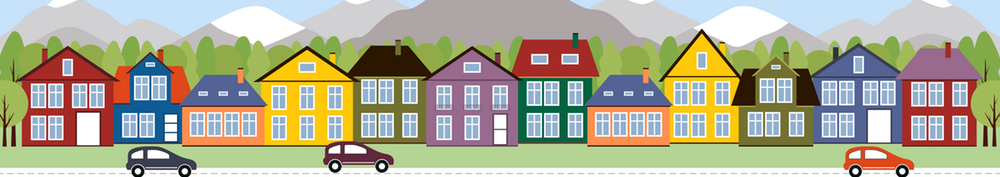

# Kaggle Competition - Predict House Prices
### Project Team: Aitana Hierro Garzon, Fariza Sagindykova, Aaron Huang

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### TABLE OF CONTENTS: 
- PART 1: Exploratory Data Analysis (EDA)
    - A. Dataframe shape
    - B. Data types
    - C. Summary Statistics
- PART 2: Data pre-processing and feature engenieering
    - A. Missing Values
        - i. Dropping missing values
        - ii. Correlated missing values
        - iii. Imputing missing values in test dataset
    - B. Categorical Features
    - C. Features and Target
    - D. Column Transformer: Encoding & Scaling
- PART 3: Regression Models
    - A. Linear Model
    - B. Decision Tree Regressor
    - C. Random Forest Regressor
    - D. GradientBoostingRegressor
    - E. XGBRegressor
- PART 4: Hyperparameter Tuning
    - A. RF Hypertunned 
    - B. RF Simplified 
    - C. GBRegressor Hypertunned
- PART 5: Model Evaluation
    - A. Linear Model
    - B. Decision Tree Regressor
    - C. Random Forest Regressor
    - D. GradientBoostingRegressor
    - E. XGBRegressor
    - F. RF Hypertunned 
    - G. RF Simplified 
    - H. GBRegressor Hypertunned

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## PART 1: Exploratory Data Analysis (EDA)

### A. Dataframe shape

In [2]:
#Import data set
df_train = pd.read_csv('train.csv', index_col=0)
X_test = pd.read_csv('test.csv', index_col=0)

In [3]:
#replacing NaN values with None in a 'MasVnrType' column
df_train['MasVnrType'] = df_train['MasVnrType'].apply(lambda x: "None" if pd.isna(x) else x)

df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [4]:
# Replacing NaN values with None in a specific column
X_test['MasVnrType'] = df_train['MasVnrType'].apply(lambda x: "None" if pd.isna(x) else x)

X_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng        NaN   
1463          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1464          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1465          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [5]:
#Check the first 5 rows for all the columns
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [6]:
X_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng        NaN   
1463          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1464          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
1465          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461         0.0        TA        TA     CBlock       TA       TA   
1462       108.0        TA        TA     CBlock       TA       TA   
1463         0.0        TA        TA      PConc       Gd       TA   
1464        20.0        TA        TA      PConc       TA       TA   
1465         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec       468.0          LwQ       144.0   
1462           No          ALQ       923.0          Unf         0.0   
1463           No          GLQ       791.0          Unf         0.0   
1464           No          GLQ       602.0          Unf         0.0   
1465           No          ALQ       263.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461      270.0        882.0    GasA        TA          Y      SBrkr   
1462      406.0       1329.0    GasA        TA          Y      SBrkr   
1463      137.0        928.0    GasA        Gd          Y      SBrkr   
1464      324.0        926.0    GasA        Ex          Y      SBrkr   
1465     1017.0       1280.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896           0.0           0.0   
1462      1329         0             0       1329           0.0           0.0   
1463       928       701             0       1629           0.0           0.0   
1464       926   

In [7]:
#Check the shape of the dataframe
df_train.shape

(1460, 80)

In [8]:
X_test.shape

(1459, 79)

### B. Data types

In [9]:
#Check the type of the data in every column
pd.set_option('display.max_rows', None)
print(df_train.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [10]:
#Check the column names
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
# Separating numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

In [12]:
numerical_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### C. Summary Statistics

In [14]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

## PART 2: Data pre-processing and feature engenieering

### A. Missing Values

In [15]:
#check number of null values in each column
train_missing_series = df_train.isnull().sum()
train_missing_columns = train_missing_series[train_missing_series > 0].sort_values(ascending=False)
print(train_missing_columns)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


From the heatmap of missing values we can see that NaN of Basement columns and NaN of Garage columns are perfectly positive correlated.

<Axes: >

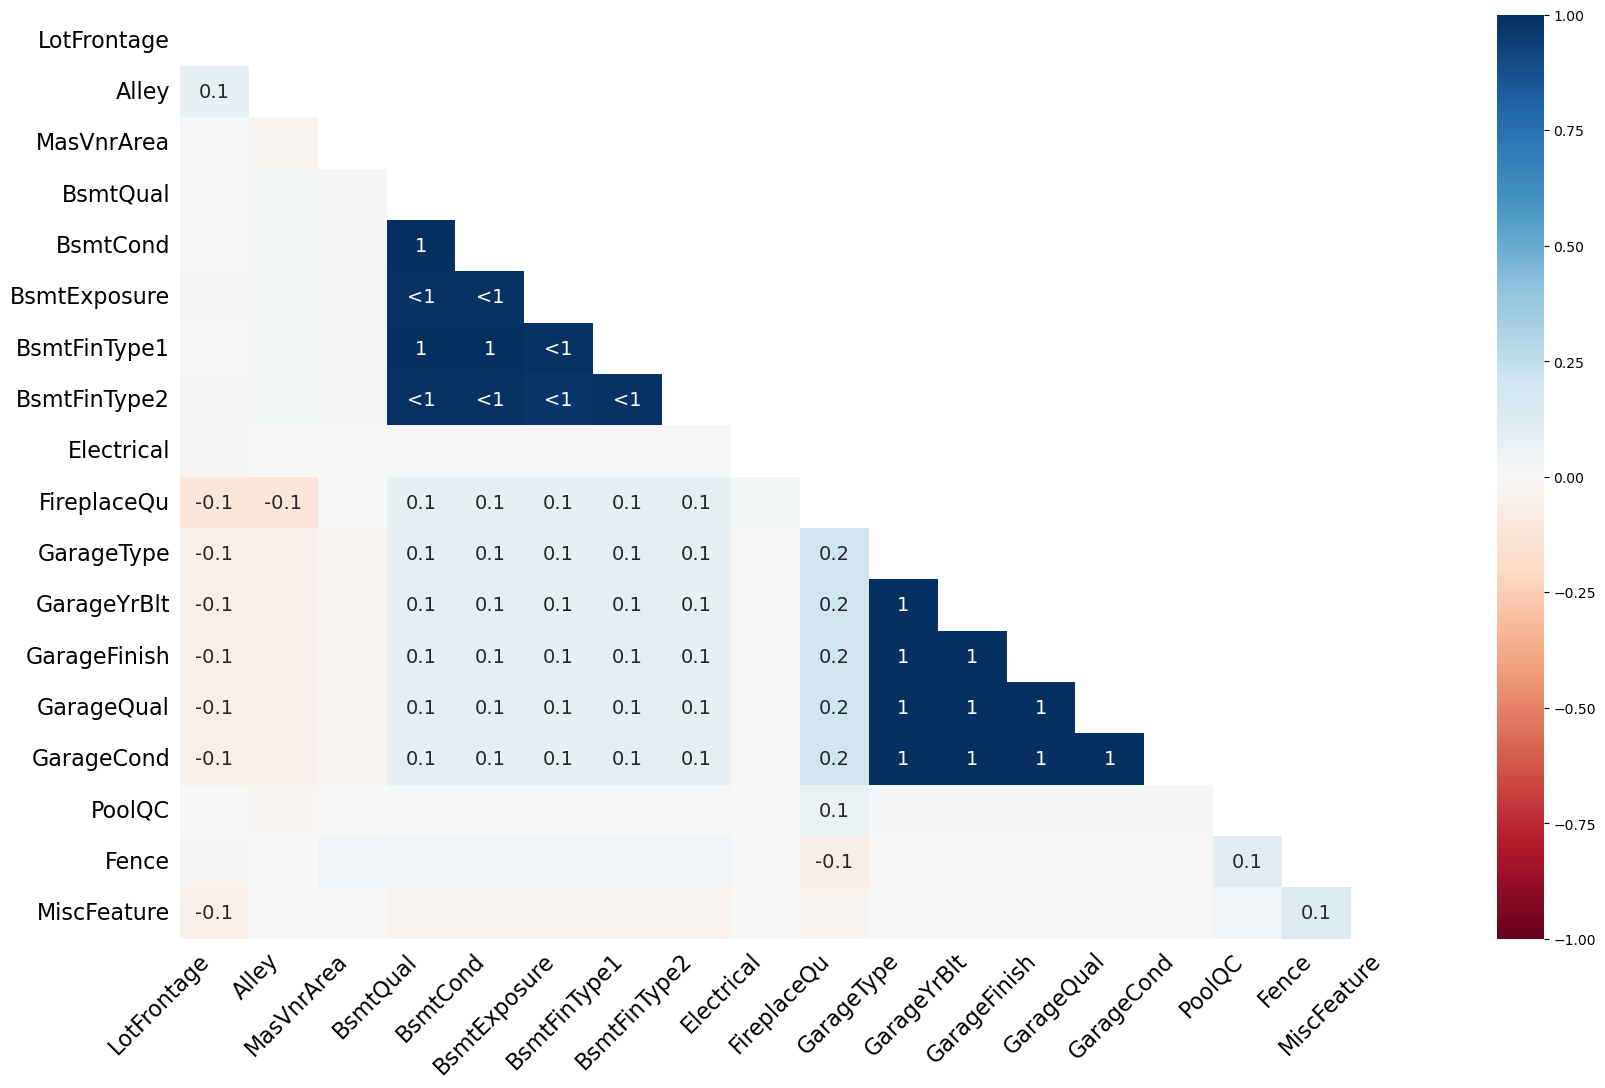

In [16]:
# Visualizing and understanding the distribution of missing values
import missingno as msno
msno.heatmap(df_train)

Upon examining the scatter plot below, a notable feature appears in the lower-left corner where the GarageArea is recorded as 0. Further scrutiny of the dataset reveals that certain columns, namely 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', and 'GarageCond', contain missing values. Upon interpretation, these missing values suggest that the corresponding houses lack garages.

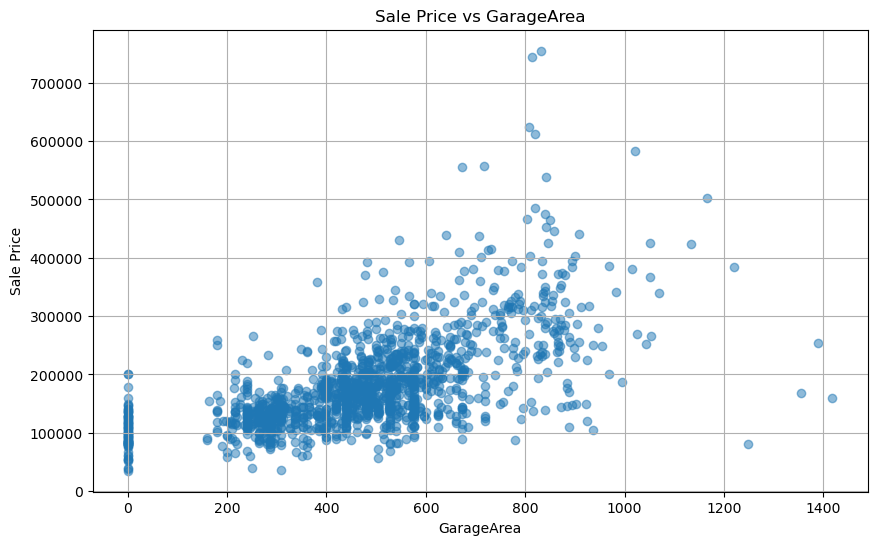

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['GarageArea'], df_train['SalePrice'], alpha=0.5)
plt.title('Sale Price vs GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

The same with Basement, NaN in columns BsmtExposure, BsmtFinType, BsmtFinType1, BsmtCond, BsmtQual means that house lacks basement. So we can say that the values missing due to absence of a feature.

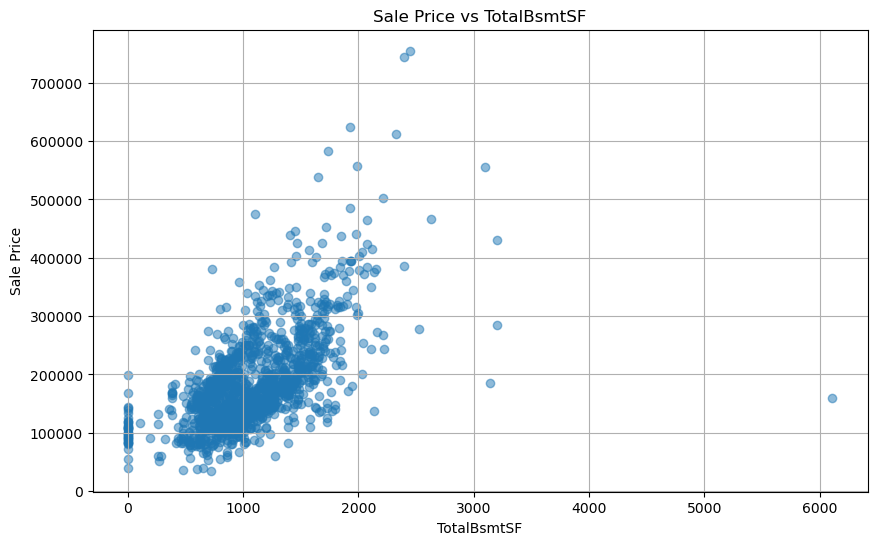

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'], alpha=0.5)
plt.title('Sale Price vs TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

#### Missing values in Test dataset

In [19]:
test_missing_series = X_test.isnull().sum()
test_missing_columns = test_missing_series[test_missing_series > 0].sort_values(ascending=False)
print(test_missing_columns)

MasVnrType      1459
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [20]:
X_test.GarageArea.value_counts()

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
528.0     32
240.0     31
480.0     30
308.0     28
264.0     27
288.0     23
336.0     17
280.0     14
506.0     14
495.0     13
462.0     13
384.0     12
525.0     11
286.0     11
216.0     11
624.0     10
312.0     10
420.0     10
504.0      9
550.0      9
672.0      8
478.0      8
390.0      8
542.0      7
470.0      7
441.0      7
482.0      7
200.0      7
460.0      7
297.0      7
180.0      7
473.0      7
578.0      6
588.0      6
300.0      6
294.0      6
252.0      6
720.0      6
502.0      6
616.0      6
360.0      5
450.0      5
572.0      5
472.0      5
352.0      5
512.0      5
320.0      5
315.0      5
517.0      5
610.0      5
660.0      5
520.0      5
784.0      5
564.0      5
253.0      4
625.0      4
410.0      4
529.0      4
270.0      4
864.0      4
392.0      4
434.0      4
850.0      4
670.0      4
540.0      4
515.0      4
256.0      4
530.0      4
319.0      4
730.0      4
461.0      4
430.0      4

<Axes: >

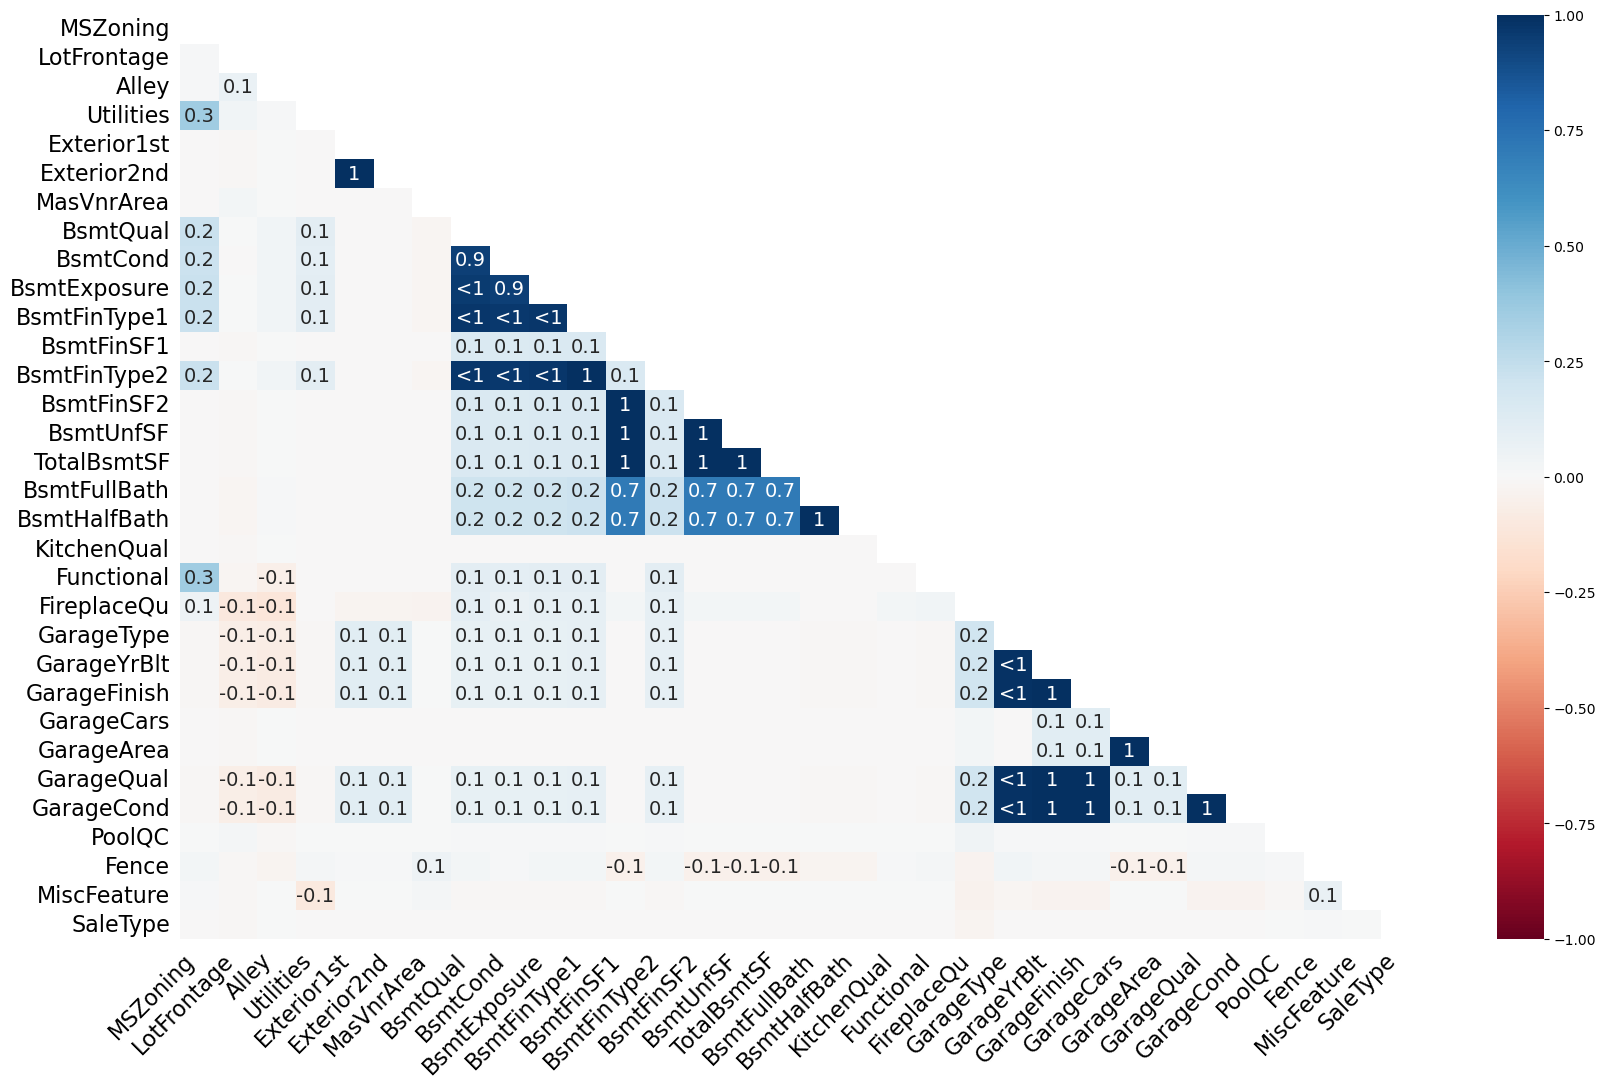

In [21]:
msno.heatmap(X_test)

### i. Dropping missing values

As some columns have a lot of missing values, we decided to drop entirely these columns rather than imputing values.

In [22]:
df_train =df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1).copy()

In [23]:
# Verification that we dropped 4 columns
df_train.shape

(1460, 75)

As 'MasVnrArea', 'MasVnrType', 'Electrical' in total have 9 rows with missing values, it is better to remove these rows from our training data.

In [24]:
selected_columns = ['MasVnrType', 'MasVnrArea', 'Electrical']

# Delete rows with missing values in selected columns

df_train.dropna(subset=selected_columns, inplace=True)

Confirming that we removed 9 rows:

In [25]:
df_train.shape

(1451, 75)

Removing columns in Test data:

In [26]:
X_test =X_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1).copy()

In [27]:
X_test.shape

(1459, 74)

### ii. Correlated missing values

For categorical features, we can treat missing data as just another category, which we call ‘No Garage’.

In [28]:
df_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].head()

GarageType GarageFinish GarageQual GarageCond
Id                                              
1      Attchd          RFn         TA         TA
2      Attchd          RFn         TA         TA
3      Attchd          RFn         TA         TA
4      Detchd          Unf         TA         TA
5      Attchd          RFn         TA         TA

In [29]:
placeholder_value = 'No Garage'
columns_to_fill = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing values in multiple columns with the placeholder value
df_train[columns_to_fill] = df_train[columns_to_fill].fillna(placeholder_value)

# Verify that missing values have been replaced
print(df_train[columns_to_fill].describe())

       GarageType GarageFinish GarageQual GarageCond
count        1451         1451       1451       1451
unique          7            4          6          6
top        Attchd          Unf         TA         TA
freq          863          605       1302       1317


In [30]:
placeholder_value = 'No Garage'
columns_to_fill = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing values in multiple columns with the placeholder value
X_test[columns_to_fill] = X_test[columns_to_fill].fillna(placeholder_value)

For numerical column GarageYrBlt, we replaced missing values with corresponding values of YearBuilt.

In [31]:
df_train['GarageYrBlt'].fillna(df_train['YearBuilt'],inplace=True )

In [32]:
X_test['GarageYrBlt'].fillna(X_test['YearBuilt'],inplace=True )

The same action was performed with missing values in Basement columns.

In [33]:
df_train[['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1']].head()

BsmtExposure BsmtFinType2 BsmtQual BsmtCond BsmtFinType1
Id                                                         
1            No          Unf       Gd       TA          GLQ
2            Gd          Unf       Gd       TA          ALQ
3            Mn          Unf       Gd       TA          GLQ
4            No          Unf       TA       Gd          ALQ
5            Av          Unf       Gd       TA          GLQ

In [34]:
placeholder_value = 'No Basement'
columns_to_fill = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1']

# Fill missing values in multiple columns with the placeholder value
df_train[columns_to_fill] = df_train[columns_to_fill].fillna(placeholder_value)

# Verify that missing values have been replaced
print(df_train[columns_to_fill].describe())

       BsmtExposure BsmtFinType2 BsmtQual BsmtCond BsmtFinType1
count          1451         1451     1451     1451         1451
unique            5            7        5        5            7
top              No          Unf       TA       TA          Unf
freq            945         1247      648     1303          427


In [35]:
# Fill missing values in multiple columns with the placeholder value
placeholder_value = 'No Basement'
columns_to_fill = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1']
X_test[columns_to_fill] = X_test[columns_to_fill].fillna(placeholder_value)

In [36]:
X_test['MasVnrType'].fillna('No Masonry', inplace=True)

In [37]:
X_test['MasVnrArea'].fillna(0, inplace=True)

Filling NaN in categorical columns with most frequent values:

In [38]:
columns_to_fill = ['MSZoning','SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'GarageCars', 'Utilities', 'Functional', 'BsmtFullBath', 'BsmtHalfBath']

# Iterate over each column and fill NaN values with the most frequent value
for column in columns_to_fill:
    most_frequent_value = X_test[column].mode()[0]
    X_test[column].fillna(most_frequent_value, inplace=True)

Filling NaN in numerical columns with mean values:

In [39]:
columns_to_fill = ['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea']

# Iterate over each column and fill NaN values with the mean value
for column in columns_to_fill:
    mean_value = X_test[column].mean()
    X_test[column].fillna(mean_value, inplace=True)

So after actions above, we have only one numerical column LotFrontage with 257 missing values. We can not drop this column, as we will lost important information. Thus we will try different imputing methods to handle missing values.

In [40]:
train_missing_series = df_train.isnull().sum()
train_missing_columns = train_missing_series[train_missing_series > 0].sort_values(ascending=False)
print(train_missing_columns)

LotFrontage    257
dtype: int64


In [41]:
test_missing_series = X_test.isnull().sum()
test_missing_columns = test_missing_series[test_missing_series > 0].sort_values(ascending=False)
print(test_missing_columns)

LotFrontage    227
dtype: int64


According to some forums, the NAN values in LotFrontage represent the 0 values for this variable.

In [42]:
df_train['LotFrontage'].fillna(0, inplace=True)

### iii. Imputing missing values in test dataset

In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

# Fit and transform the 'LotFrontage' column
X_test['LotFrontage'] = imputer.fit_transform(X_test[['LotFrontage']])

In [44]:
X_test.isna().any().sum()

0

The boxplots are essential in EDA because they provide a concise yet informative summary of the data distribution, aiding in the identification of outliers, understanding central tendency and dispersion, comparing distributions, and assessing symmetry and skewness.

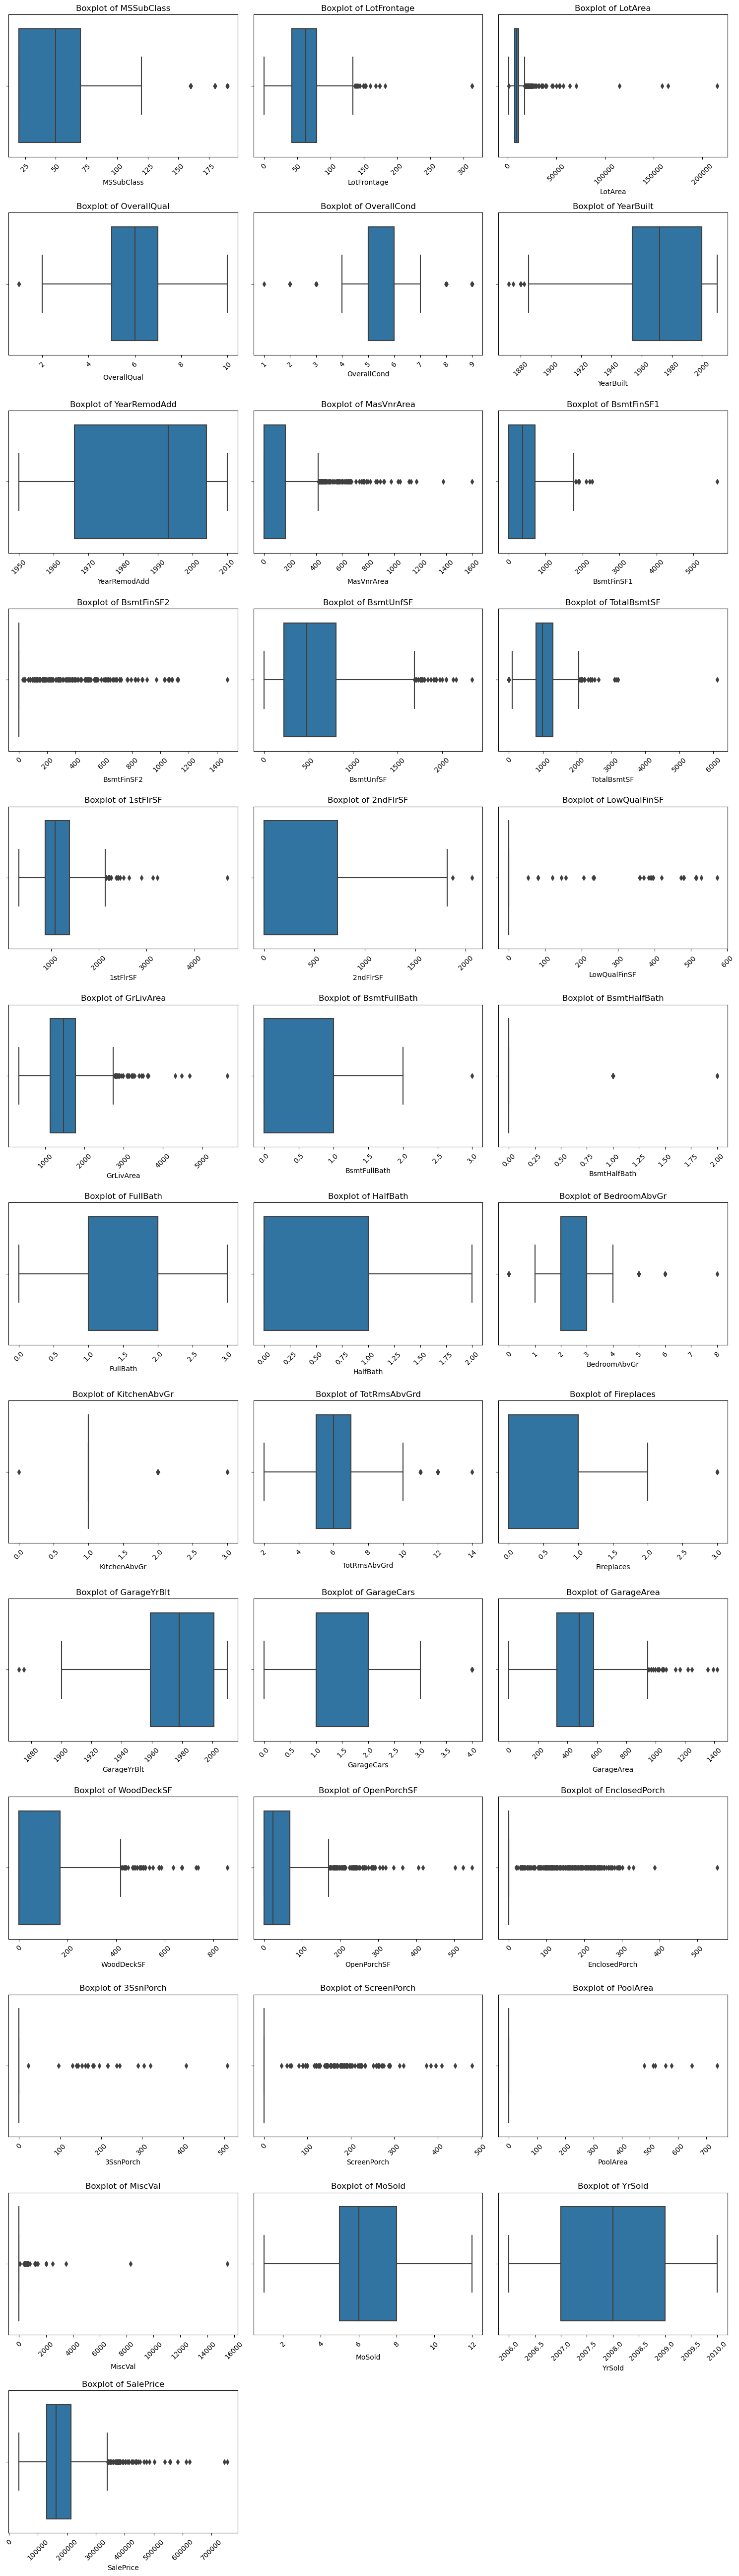

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter numerical columns
numerical_columns = df_train.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_rows = (len(numerical_columns) + 2) // 3  # Round up division
n_cols = 3  # Three boxplots per row

# Set figure size
figsize = (15, 4 * n_rows)  # Adjust the width and height as needed

# Create subplots with specified figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten axes
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_train[column], ax=axes[i], showfliers=True)
    axes[i].set_title(f'Boxplot of {column}')

    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(len(numerical_columns), n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### B. Categorical Features

We aim to categorize the types of categorical variables, assess their distribution, and visualize the data to extract insights. Countplots offer an effective means of visualizing the distribution of categorical variables, providing insights into the frequency of occurrence for each category. By identifying the unique categories within each categorical variable, we can comprehend the distribution of each category and detect any imbalances. 

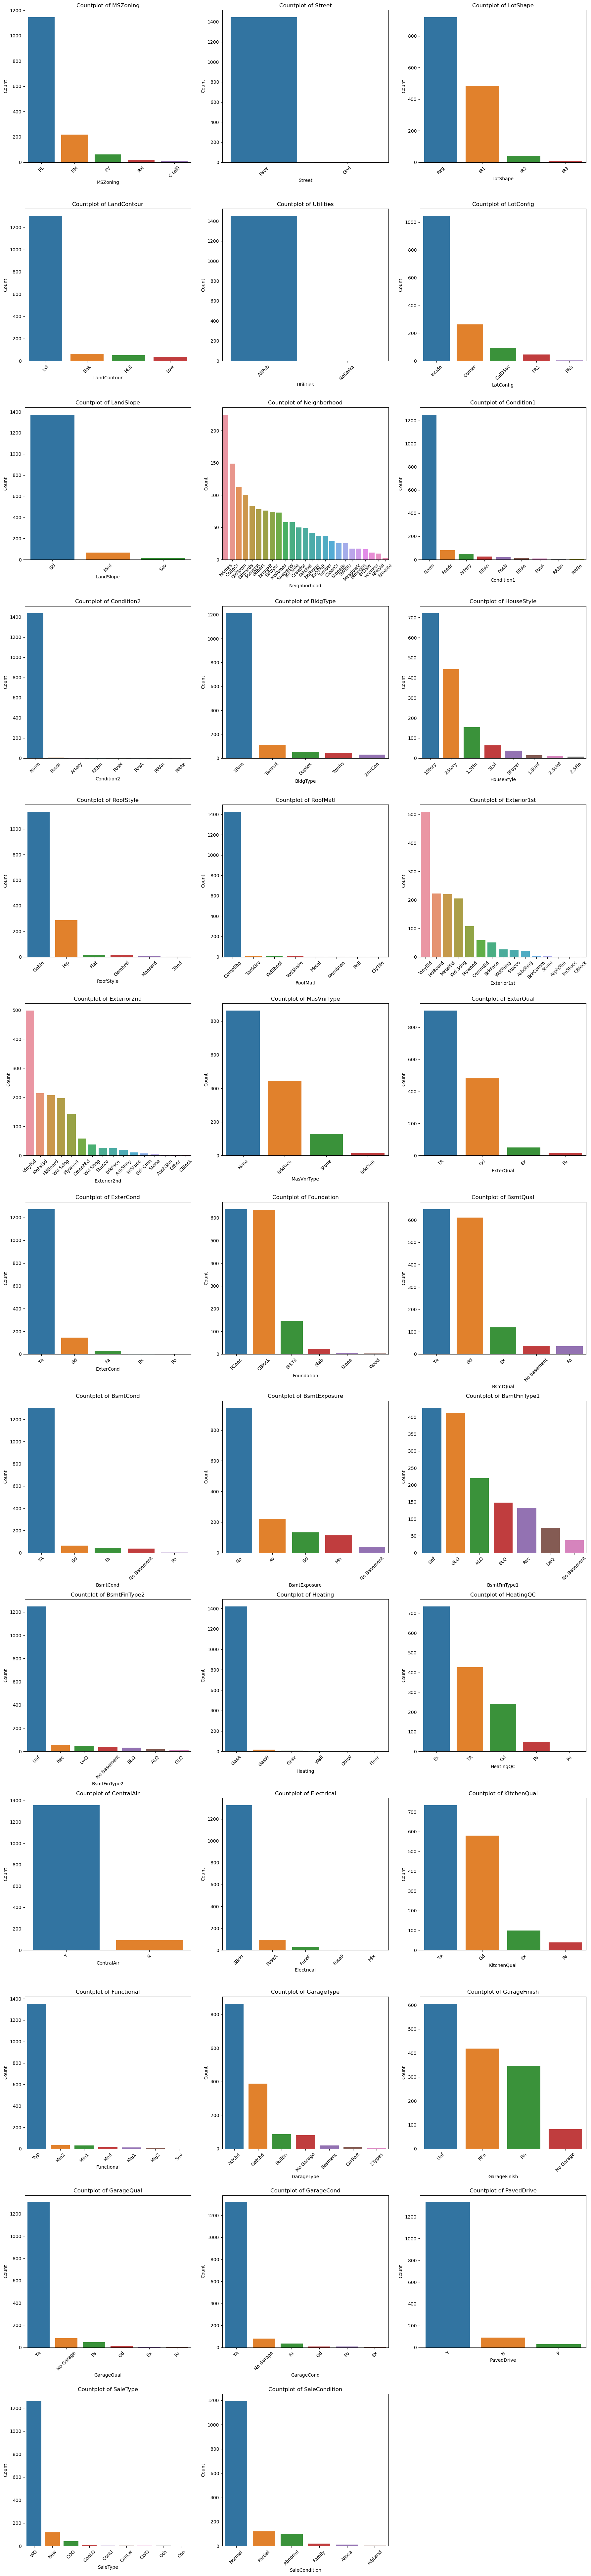

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter categorical columns
categorical_columns = df_train.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
n_rows = (len(categorical_columns) + 2) // 3  # Round up division
n_cols = 3  # Three countplots per row

# Set figure size
figsize = (18, 6 * n_rows)  # Adjust the width and height as needed

# Create subplots with specified figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten axes
axes = axes.flatten()

# Plot countplots for each categorical column sorted by frequencies
for i, column in enumerate(categorical_columns):
    # Sort the values of the column based on their frequencies
    sorted_values = df_train[column].value_counts().sort_values(ascending=False)
    sns.countplot(x=df_train[column], ax=axes[i], order=sorted_values.index)
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(len(categorical_columns), n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the visual analysis of the graphs presented above, we have identified variables exhibiting imbalanced categories, wherein a single category significantly outweighs the others. Consequently, in the subsequent code, we have identified variables where one category comprises 90% of the data, rendering them less informative. Consequently, we have removed these variables from our analysis, as they are unlikely to contribute meaningful insights.

In [47]:
def find_dominating_columns(df, threshold=0.9):
    dominating_columns = []
    total_rows = len(df)
    
    for column in df.columns:
        most_common_category_count = df[column].value_counts().max()
        category_percentage = most_common_category_count / total_rows
        
        if category_percentage > threshold:
            dominating_columns.append(column)
    
    return dominating_columns

# Find columns with one dominating category
dominating_columns_train = find_dominating_columns(df_train, threshold=0.9)

dominating_columns_test = find_dominating_columns(X_test, threshold=0.9)

print("Columns with one dominating category (more than 90%):", dominating_columns_train)
 
print("Columns with one dominating category (more than 90%):", dominating_columns_test)
# we should delete these columns from test dataset also as columns chould be consistent in both dataframes.

Columns with one dominating category (more than 90%): ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Columns with one dominating category (more than 90%): ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [48]:
df_train.drop(columns=dominating_columns_train, inplace=True)

In [49]:
df_train.shape

(1451, 57)

In [50]:
X_test.drop(columns=dominating_columns_train, inplace=True)

Categorical variables come in two types: nominal and ordinal. Nominal variables feature categories without any inherent order, whereas ordinal variables possess categories with a specific order, conveying information valuable for predictive models.

1. For nominal-type categorical variables, where categories lack a natural order, we employ one-hot encoding. This method generates binary (dummy) variables for each category.

2. On the other hand, for ordinal-type categorical variables, where categories hold a distinct order, we utilize ordinal encoding. This technique maps each category to its corresponding ordinal value.

In [51]:
ordinal_categorical_columns = ['LotShape', 'ExterQual', 'ExterCond', 
                   'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageFinish','BsmtQual', 'BsmtCond', 
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'LandContour']

In [52]:
column_datatypes = df_train[ordinal_categorical_columns].dtypes
print(column_datatypes)

LotShape        object
ExterQual       object
ExterCond       object
HeatingQC       object
KitchenQual     object
GarageQual      object
GarageFinish    object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
LandContour     object
dtype: object


In [53]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [54]:
import category_encoders as ce

# Define the mappings for multiple columns
mappings = [
    {'col': 'LotShape', 'mapping': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}},
    {'col': 'ExterQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'ExterCond', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'HeatingQC', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'KitchenQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'GarageQual', 'mapping': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'GarageFinish', 'mapping': {'No Garage':1, 'Unf':1, 'RFn':2, 'Fin':3}},
    {'col': 'BsmtQual', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtCond', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtExposure', 'mapping': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}},
    {'col': 'BsmtFinType1', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}},
    {'col': 'BsmtFinType2', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}},
    {'col': 'LandContour', 'mapping':{'Low':0, 'HLS':1, 'Bnk':2, 'Lvl':3}},
    
]

# Initialize OrdinalEncoder
encoder = ce.OrdinalEncoder(cols=ordinal_categorical_columns, mapping=mappings, return_df=True)

# Transform the DataFrame
df_train = encoder.fit_transform(df_train)


In [55]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                     
1           60       RL         65.0     8450         3            3   
2           20       RL         80.0     9600         3            3   
3           60       RL         68.0    11250         2            3   
4           70       RL         60.0     9550         2            3   
5           60       RL         84.0    14260         2            3   

   LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
Id                                                                      
1     Inside      CollgCr       Norm     1Fam     2Story            7   
2        FR2      Veenker      Feedr     1Fam     1Story            6   
3     Inside      CollgCr       Norm     1Fam     2Story            7   
4     Corner      Crawfor       Norm     1Fam     2Story            7   
5        FR2      NoRidge       Norm     1Fam     2Story            8   

    OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
Id                                                                           
1             5       2003          2003     Gable     VinylSd     VinylSd   
2             8       1976          1976     Gable     MetalSd     MetalSd   
3             5       2001          2002     Gable     VinylSd     VinylSd   
4             5       1915          1970     Gable     Wd Sdng     Wd Shng   
5             5       2000          2000     Gable     VinylSd     VinylSd   

   MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  \
Id                                                                     
1     BrkFace       196.0          3          2      PConc         4   
2        None         0.0          2          2     CBlock         4   
3     BrkFace       162.0          3          2      PConc         4   
4        None         0.0          2          2     BrkTil         3   
5     BrkFace       350.0          3          2      PConc         4   

    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
Id                                                                   
1          3             1             6         706             1   
2          3             4             5         978             1   
3          3             2             6         486             1   
4          4             1             5         216             1   
5          3             3             6         655             1   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
Id                                                                      
1            0        150          856          4       856       854   
2            0        284         1262          4      1262         0   
3            0        434          920          4       920       866   
4            0        540          756          3       961       756   
5            0        490         1145          4      1145      1053   

    GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
Id                                                                           
1        1710             1         2         1             3            3   
2        1262             0         2         0             3            2   
3        1786             1         2         1             3            3   
4        1717             1         1         0             3            3   
5        2198             1         2         1             4            3   

    TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
Id                                                                   
1              8           0     Attchd       2003.0             2   
2              6           1     Attchd       1976.0             2   
3              6           1     Attchd       2001.0             2   
4              7           1     De

Checking numerical columns after ordinal encoding:

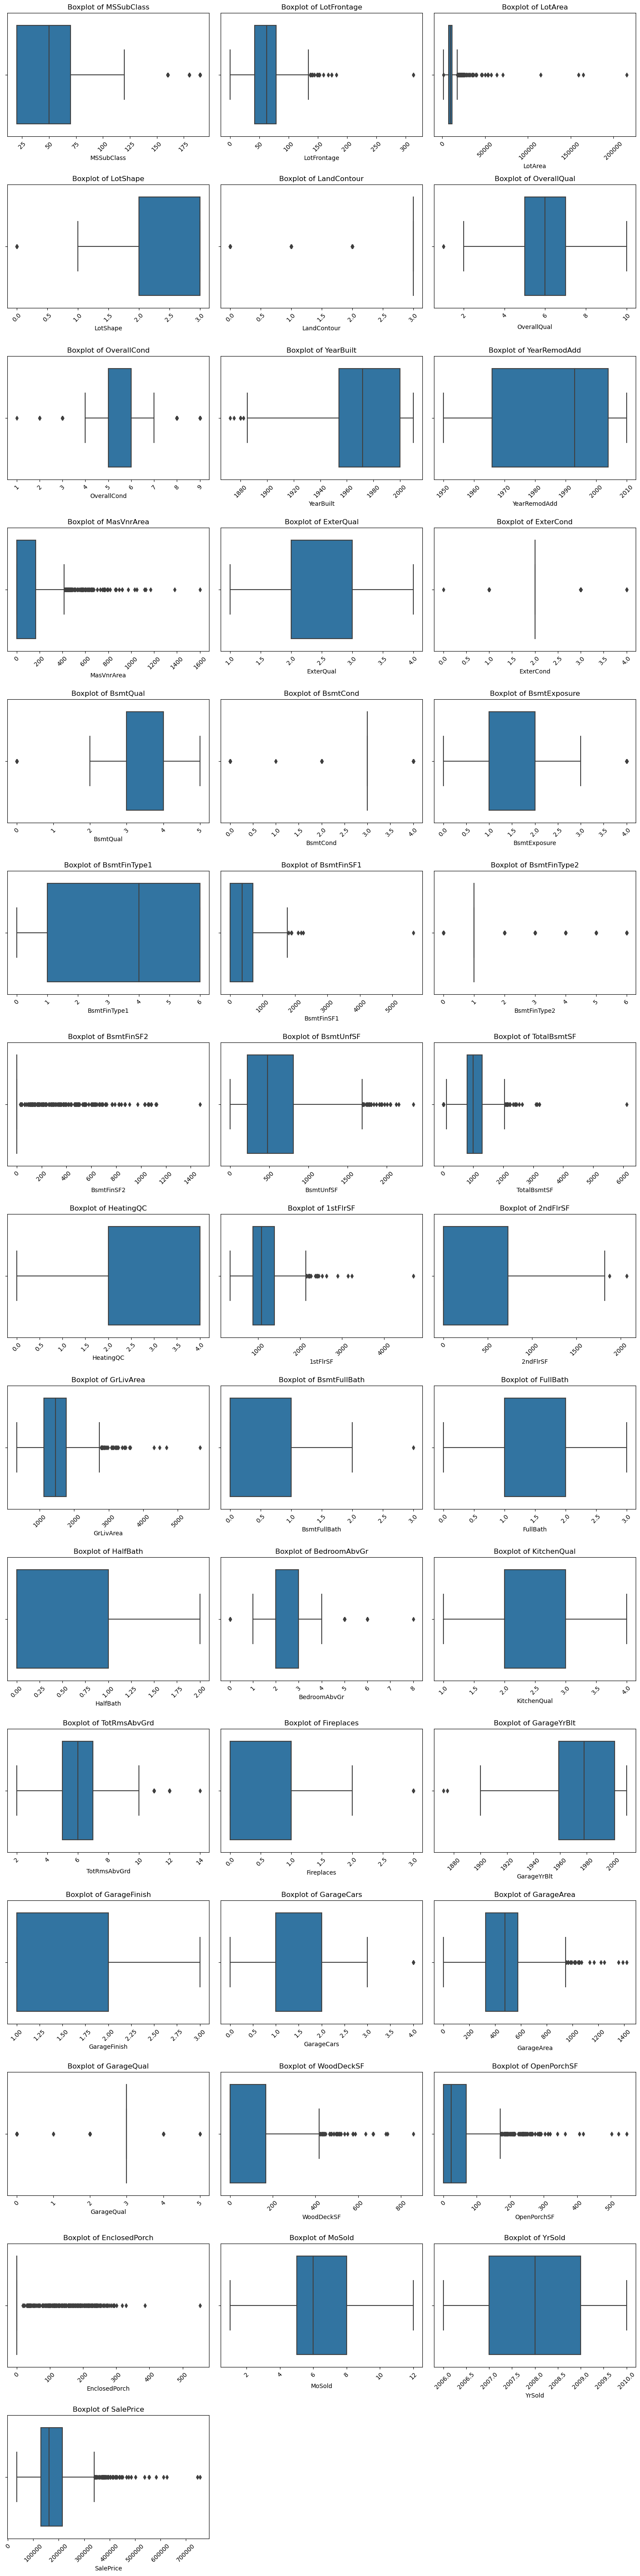

In [56]:
# Filter numerical columns
numerical_columns = df_train.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots
n_rows = (len(numerical_columns) + 2) // 3  # Round up division
n_cols = 3  # Three boxplots per row

# Set figure size
figsize = (15, 4 * n_rows)  # Adjust the width and height as needed

# Create subplots with specified figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten axes
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_train[column], ax=axes[i], showfliers=True)
    axes[i].set_title(f'Boxplot of {column}')

    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(len(numerical_columns), n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

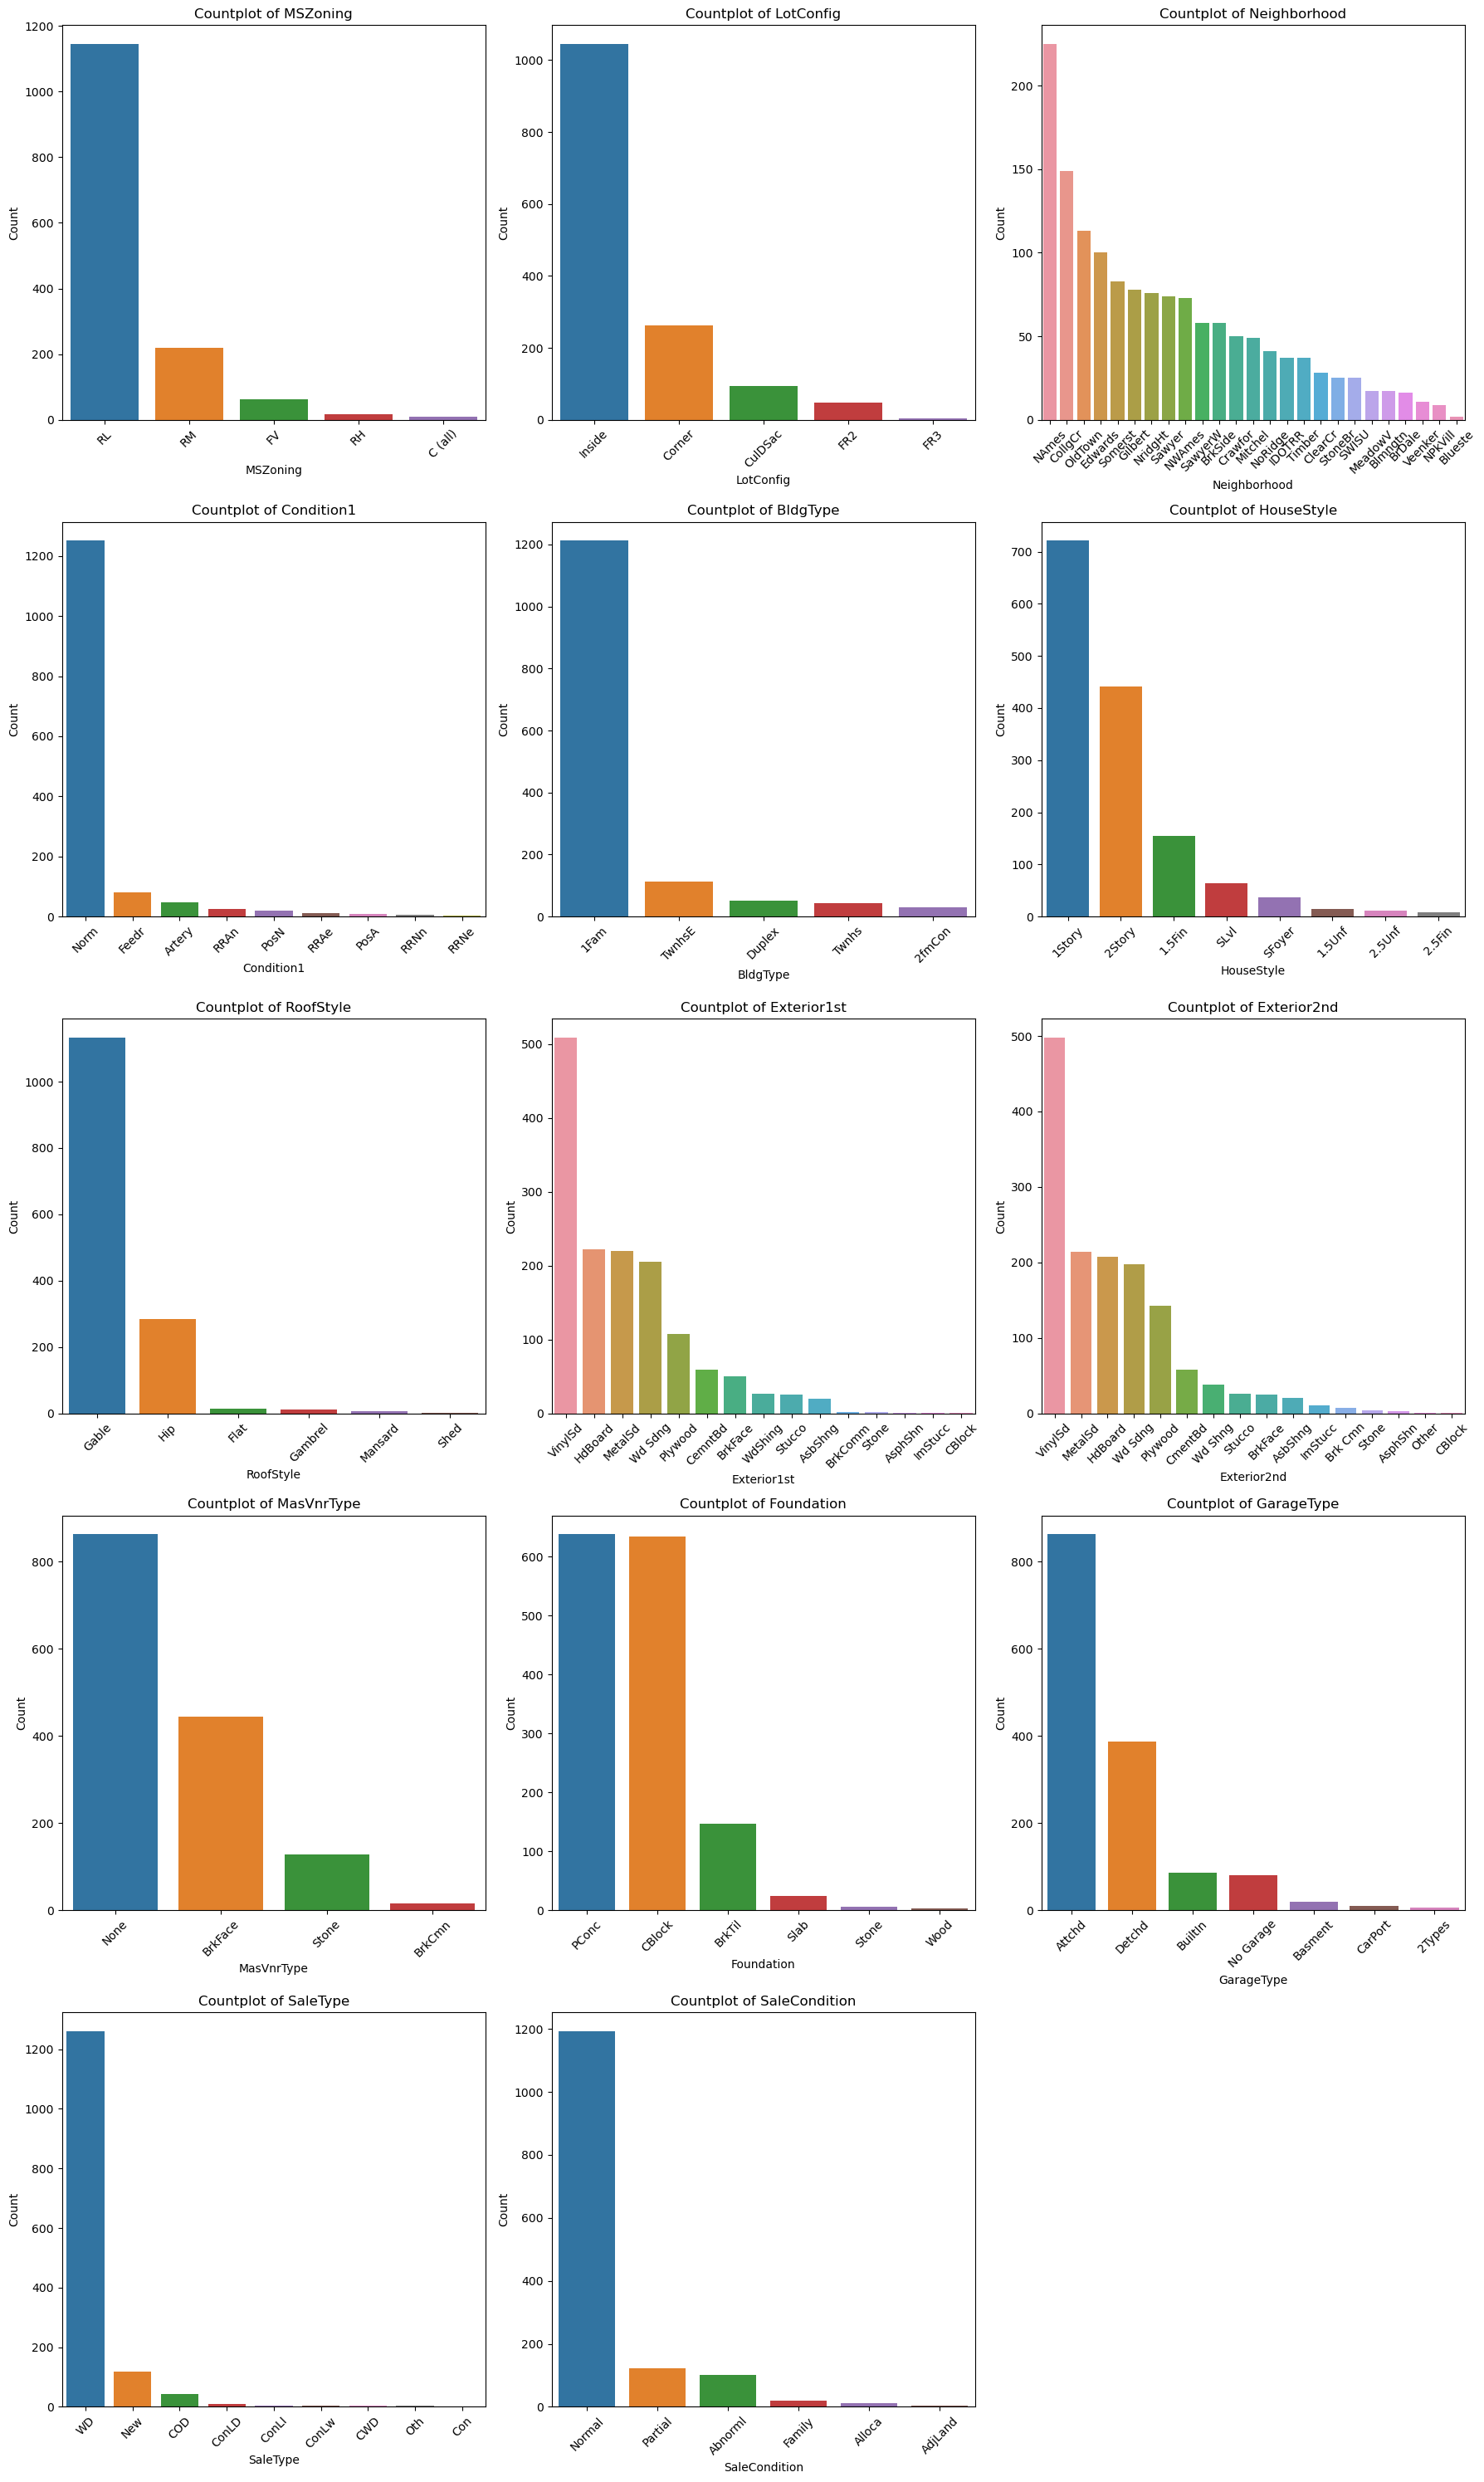

In [57]:
# Filter categorical columns
categorical_columns = df_train.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
n_rows = (len(categorical_columns) + 2) // 3  # Round up division
n_cols = 3  # Three countplots per row

# Set figure size
figsize = (18, 6 * n_rows)  # Adjust the width and height as needed

# Create subplots with specified figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten axes
axes = axes.flatten()

# Plot countplots for each categorical column sorted by frequencies
for i, column in enumerate(categorical_columns):
    # Sort the values of the column based on their frequencies
    sorted_values = df_train[column].value_counts().sort_values(ascending=False)
    sns.countplot(x=df_train[column], ax=axes[i], order=sorted_values.index)
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(len(categorical_columns), n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [58]:
mappings = [
    {'col': 'LotShape', 'mapping': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}},
    {'col': 'ExterQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'ExterCond', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'HeatingQC', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'KitchenQual', 'mapping': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}},
    {'col': 'GarageQual', 'mapping': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'GarageFinish', 'mapping': {'No Garage':1, 'Unf':1, 'RFn':2, 'Fin':3}},
    {'col': 'BsmtQual', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtCond', 'mapping': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}},
    {'col': 'BsmtExposure', 'mapping': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}},
    {'col': 'BsmtFinType1', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}},
    {'col': 'BsmtFinType2', 'mapping': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}},
    {'col': 'LandContour', 'mapping':{'Low':0, 'HLS':1, 'Bnk':2, 'Lvl':3}},
    
]

# Initialize OrdinalEncoder
encoder = ce.OrdinalEncoder(cols=ordinal_categorical_columns, mapping=mappings, return_df=True)

# Transform the DataFrame
X_test = encoder.fit_transform(X_test)

### B. Features and Target

In [59]:
df_train.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

In [60]:
features = list(df_train.columns)
target = "SalePrice"
features.remove(target)

#Train set: #get X_train and y_train
X_train = df_train[features].copy()
y_train = df_train[target].copy()

In [61]:
X_train.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                     
1           60       RL         65.0     8450         3            3   
2           20       RL         80.0     9600         3            3   
3           60       RL         68.0    11250         2            3   
4           70       RL         60.0     9550         2            3   
5           60       RL         84.0    14260         2            3   

   LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
Id                                                                      
1     Inside      CollgCr       Norm     1Fam     2Story            7   
2        FR2      Veenker      Feedr     1Fam     1Story            6   
3     Inside      CollgCr       Norm     1Fam     2Story            7   
4     Corner      Crawfor       Norm     1Fam     2Story            7   
5        FR2      NoRidge       Norm     1Fam     2Story            8   

    OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
Id                                                                           
1             5       2003          2003     Gable     VinylSd     VinylSd   
2             8       1976          1976     Gable     MetalSd     MetalSd   
3             5       2001          2002     Gable     VinylSd     VinylSd   
4             5       1915          1970     Gable     Wd Sdng     Wd Shng   
5             5       2000          2000     Gable     VinylSd     VinylSd   

   MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  \
Id                                                                     
1     BrkFace       196.0          3          2      PConc         4   
2        None         0.0          2          2     CBlock         4   
3     BrkFace       162.0          3          2      PConc         4   
4        None         0.0          2          2     BrkTil         3   
5     BrkFace       350.0          3          2      PConc         4   

    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
Id                                                                   
1          3             1             6         706             1   
2          3             4             5         978             1   
3          3             2             6         486             1   
4          4             1             5         216             1   
5          3             3             6         655             1   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
Id                                                                      
1            0        150          856          4       856       854   
2            0        284         1262          4      1262         0   
3            0        434          920          4       920       866   
4            0        540          756          3       961       756   
5            0        490         1145          4      1145      1053   

    GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
Id                                                                           
1        1710             1         2         1             3            3   
2        1262             0         2         0             3            2   
3        1786             1         2         1             3            3   
4        1717             1         1         0             3            3   
5        2198             1         2         1             4            3   

    TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
Id                                                                   
1              8           0     Attchd       2003.0             2   
2              6           1     Attchd       1976.0             2   
3              6           1     Attchd       2001.0             2   
4              7           1     De

In [62]:
y_train.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

### C. Column Transformer: Encoding & Scaling

In [63]:
#Refresh the numerical and categorical columns variables after cleaning the missing values
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
nominal_categorical_cols = X_train.select_dtypes(include=['object']).columns

In [64]:
X_train[nominal_categorical_cols].head()

MSZoning LotConfig Neighborhood Condition1 BldgType HouseStyle RoofStyle  \
Id                                                                            
1        RL    Inside      CollgCr       Norm     1Fam     2Story     Gable   
2        RL       FR2      Veenker      Feedr     1Fam     1Story     Gable   
3        RL    Inside      CollgCr       Norm     1Fam     2Story     Gable   
4        RL    Corner      Crawfor       Norm     1Fam     2Story     Gable   
5        RL       FR2      NoRidge       Norm     1Fam     2Story     Gable   

   Exterior1st Exterior2nd MasVnrType Foundation GarageType SaleType  \
Id                                                                     
1      VinylSd     VinylSd    BrkFace      PConc     Attchd       WD   
2      MetalSd     MetalSd       None     CBlock     Attchd       WD   
3      VinylSd     VinylSd    BrkFace      PConc     Attchd       WD   
4      Wd Sdng     Wd Shng       None     BrkTil     Detchd       WD   
5      VinylSd     VinylSd    BrkFace      PConc     Attchd       WD   

   SaleCondition  
Id                
1         Normal  
2         Normal  
3         Normal  
4        Abnorml  
5         Normal

In [65]:
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
nominal_categorical_cols = X_test.select_dtypes(include=['object']).columns

In [66]:
X_test[nominal_categorical_cols].head()

MSZoning LotConfig Neighborhood Condition1 BldgType HouseStyle RoofStyle  \
Id                                                                              
1461       RH    Inside        NAmes      Feedr     1Fam     1Story     Gable   
1462       RL    Corner        NAmes       Norm     1Fam     1Story       Hip   
1463       RL    Inside      Gilbert       Norm     1Fam     2Story     Gable   
1464       RL    Inside      Gilbert       Norm     1Fam     2Story     Gable   
1465       RL    Inside      StoneBr       Norm   TwnhsE     1Story     Gable   

     Exterior1st Exterior2nd  MasVnrType Foundation GarageType SaleType  \
Id                                                                        
1461     VinylSd     VinylSd  No Masonry     CBlock     Attchd       WD   
1462     Wd Sdng     Wd Sdng  No Masonry     CBlock     Attchd       WD   
1463     VinylSd     VinylSd  No Masonry      PConc     Attchd       WD   
1464     VinylSd     VinylSd  No Masonry      PConc     Attchd       WD   
1465     HdBoard     HdBoard  No Masonry      PConc     Attchd       WD   

     SaleCondition  
Id                  
1461        Normal  
1462        Normal  
1463        Normal  
1464        Normal  
1465        Normal

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


scaler = StandardScaler()
enc = OneHotEncoder(handle_unknown='ignore')

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), nominal_categorical_cols)
    ])

#Then we can wrap the ColumnTransformer with our models in a different pipeline

In [68]:
X_train.shape

(1451, 56)

In [69]:
X_test.shape

(1459, 56)

## PART 3: Regression Models

### A. Linear Models

In [70]:
#Create a ColumnTransformer to transform above numerical_cols and categorical_cols at the same time.
#Specifically, apply StandardScaler to numerical_cols and OneHotEncoder to categorical_cols. 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

param_grid = {'regressor__alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(model, param_grid, scoring = 'neg_mean_squared_error', cv=10)
grid.fit(X_train, y_train)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.162e+11, tolerance: 8.438e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.080e+11, tolerance: 8.207e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.496e+11, tolerance: 8.136e+08


/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.919e+11, tolerance: 8.282e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.925e+11, tolerance: 8.334e+08


/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.505e+11, tolerance: 8.014e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.707e+11, tolerance: 8.352e+08


/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.715e+10, tolerance: 8.188e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.215e+11, tolerance: 8.207e+08


/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.233e+10, tolerance: 7.750e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+11, tolerance: 8.282e+08


/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+10, tolerance: 8.352e+08
  model = cd_fast.enet_coordinate_descent(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFi...
       'Foundation', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [71]:
y_train_pred = grid.predict(X_train)

In [72]:
r2_train= r2_score(y_train, y_train_pred)
r2_train

0.8722476335708256

In [73]:
y_test_pred = grid.predict(X_test)

In [74]:
X_test_reset_index = X_test.reset_index()

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_test_pred})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_linear.csv', index=False)

Feature Correlation:

/var/folders/6m/52rlyfrd17q2l8vr2dc0gxhr0000gn/T/ipykernel_37994/620820186.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


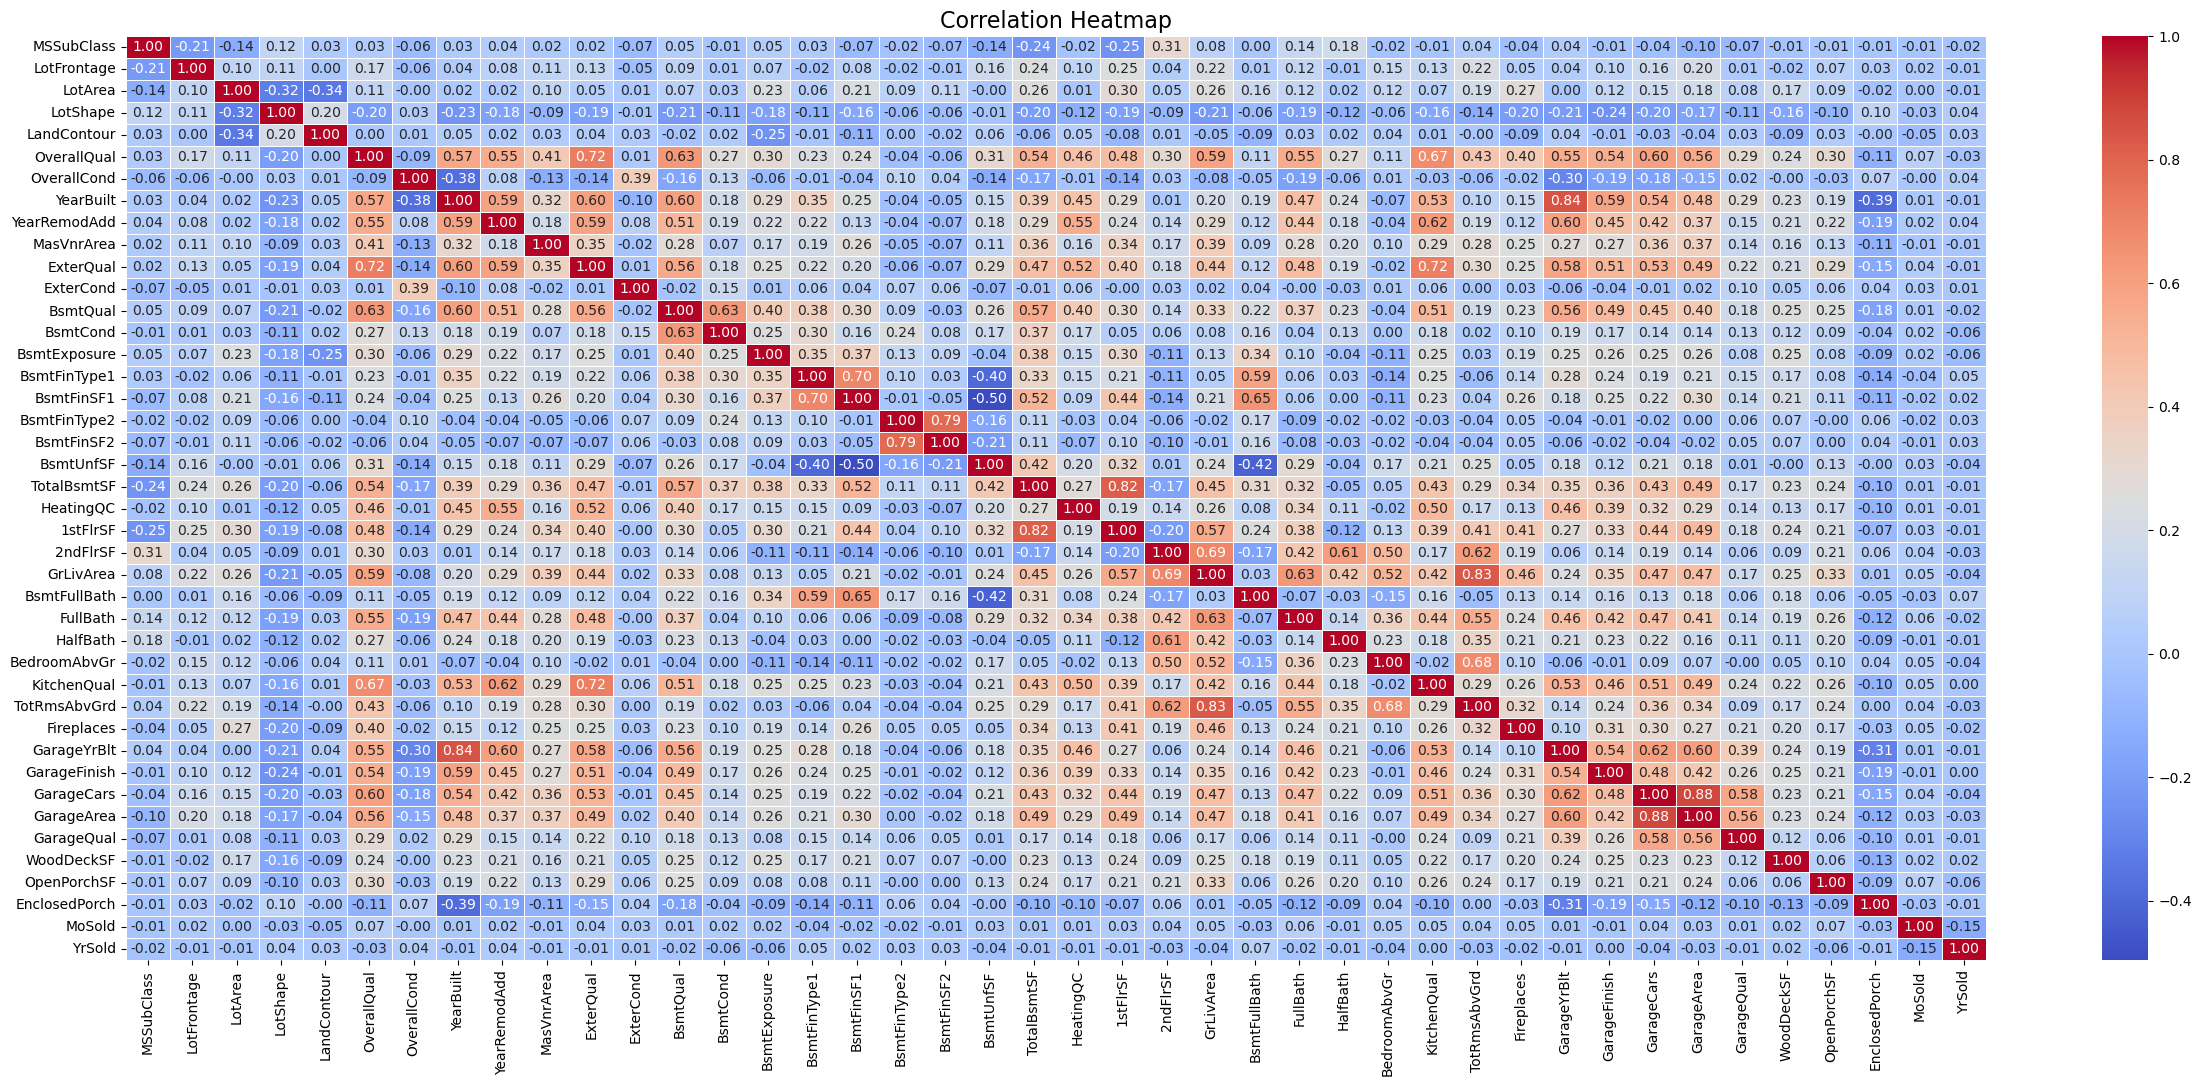

In [75]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(30, 12))

correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [76]:
correlation_matrix[correlation_matrix < 1].stack().nlargest(10)[::2]

GarageCars    GarageArea      0.882470
YearBuilt     GarageYrBlt     0.844146
GrLivArea     TotRmsAbvGrd    0.825563
TotalBsmtSF   1stFlrSF        0.818107
BsmtFinType2  BsmtFinSF2      0.788881
dtype: float64

In [77]:
correlation = df_train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=False)
correlation

SalePrice        1.000000
OverallQual      0.790085
GrLivArea        0.710073
ExterQual        0.681200
KitchenQual      0.658647
GarageCars       0.639749
GarageArea       0.622484
TotalBsmtSF      0.613299
1stFlrSF         0.606969
BsmtQual         0.584317
FullBath         0.562710
GarageFinish     0.537415
TotRmsAbvGrd     0.536366
YearBuilt        0.523274
GarageYrBlt      0.508230
YearRemodAdd     0.507488
MasVnrArea       0.477486
Fireplaces       0.468973
HeatingQC        0.427602
BsmtFinSF1       0.383995
BsmtExposure     0.372754
WoodDeckSF       0.324658
2ndFlrSF         0.322840
OpenPorchSF      0.311244
BsmtFinType1     0.303674
HalfBath         0.282331
GarageQual       0.274211
LotShape         0.271595
LotArea          0.264668
BsmtFullBath     0.224988
BsmtUnfSF        0.215707
BsmtCond         0.208984
LotFrontage      0.208453
BedroomAbvGr     0.171956
EnclosedPorch    0.128826
MSSubClass       0.082760
OverallCond      0.076361
LandContour      0.074561
MoSold      

### B. Decision Tree Regressor

In [78]:
# Check the dimensions of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1451, 56)
y_train shape: (1451,)


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor


# Create the pipeline with preprocessing and the DecisionTreeRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
X_test_reset_index = X_test.reset_index()

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_decission_tree.csv', index=False)

### C. Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Create the pipeline with preprocessing and the DecisionTreeRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest_regressor', RandomForestRegressor())])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_RF.csv', index=False)

### D. GradientBoostingRegressor

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [84]:
scaler = StandardScaler()
enc = OneHotEncoder(handle_unknown='ignore')

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), nominal_categorical_cols)
    ])

#Then we can wrap the ColumnTransformer with our models in a different pipeline
modelGB = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())])

In [85]:
# Split data into training and validation sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

# Preprocessing of training data, fit model 
modelGB.fit(X_trainset, y_trainset)

# Preprocessing of validation data, get predictions
preds = modelGB.predict(X_testset)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
# Evaluate the model
score = mean_squared_error(y_testset, preds, squared=False)  # RMSE
print('RMSE:', score)

RMSE: 29003.37715583206


In [87]:
#Train Score and Test Score
# Predict on training and testing data
y_train_pred = modelGB.predict(X_trainset)
y_test_pred = modelGB.predict(X_testset)

# Calculate and print R^2 score for training and testing set
train_score = r2_score(y_trainset, y_train_pred)
test_score = r2_score(y_testset, y_test_pred)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9702348585835298
Test Score: 0.8896757712480753


In [88]:
# Fit the pipeline on the training data
modelGB.fit(X_train, y_train)

# Make predictions on the test data
y_pred_GB = modelGB.predict(X_test)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
X_test_reset_index = X_test.reset_index()

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred_GB})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_GB.csv', index=False)

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Access the preprocessor from the pipeline
preprocessor = model.named_steps['preprocessor']

# Access the transformers within the ColumnTransformer
transformers = preprocessor.named_transformers_

# For numerical features, we assume names stay the same (since we're using 'constant' strategy for imputation)
numerical_features = numerical_cols

# For categorical features, get the new feature names after one-hot encoding
# Extract categorical feature names from the one-hot encoder's categories
categorical_features = list(transformers['cat'].categories_[0])

# Combine both lists to get the full list of transformed feature names
transformed_feature_names = list(numerical_features) + list(categorical_features)

print(transformed_feature_names)
len(transformed_feature_names)

['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'C (all)', 'FV', 'RH', 'RL', 'RM']


47

### E. XGBRegressor

In [91]:
from xgboost import XGBRegressor

In [92]:
# Create the preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Split data into training and validation sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

# Preprocessing of training data, fit model 
model.fit(X_trainset, y_trainset)

# Get predictions
predictions = model.predict(X_testset)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
# Predictions on training and test sets
train_preds = model.predict(X_trainset)
test_preds = model.predict(X_testset)

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_testset, test_preds))
print(f"Test RMSE: {rmse_test:.2f}")

Test RMSE: 31066.68


In [94]:
# Calculate R² scores for training and test sets
r2_train = r2_score(y_trainset, train_preds)
r2_test = r2_score(y_testset, test_preds)

# Print R² scores
print(f"Train R² score: {r2_train:.2f}")
print(f"Test R² score: {r2_test:.2f}")

Train R² score: 1.00
Test R² score: 0.87


In [95]:
# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_XGB = model.predict(X_test)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
X_test_reset_index = X_test.reset_index()

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred_XGB})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_XGB.csv', index=False)

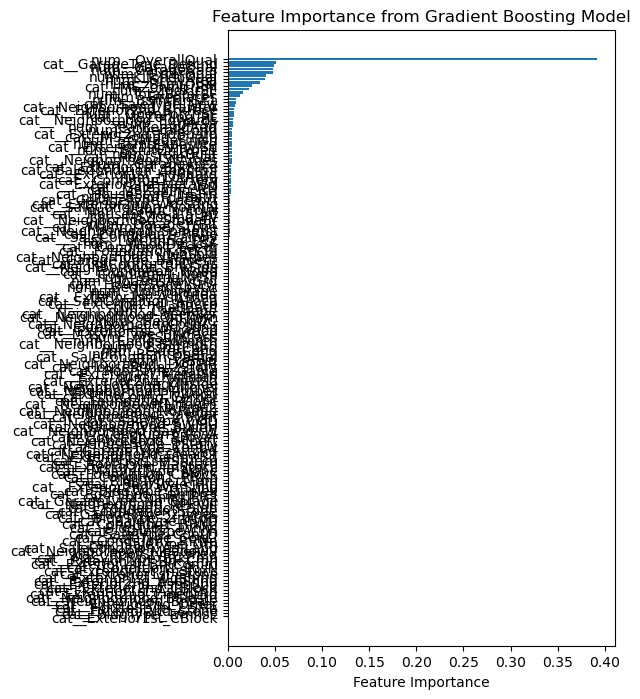

In [97]:
# Assuming 'model' is your trained Pipeline containing 'XGBRegressor' as the 'model'
# and the preprocessor has transformed the feature names

# Access the trained XGBRegressor from the pipeline
xgb_model = model.named_steps['regressor']

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Assuming the preprocessor and model are part of a pipeline,
# you need to extract the feature names after transformation.
# This can be complex due to one-hot encoding, so here's a simplified approach:

# If you followed the previous advice on getting transformed feature names:
# Assume transformed_feature_names contains the correct feature names after preprocessing

try:
    # Attempt to retrieve the transformed feature names from the column transformer
    transformed_feature_names = model.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    # Fallback if the method doesn't exist (depending on sklearn version)
    # This part may need customization based on your specific preprocessing steps
    transformed_feature_names = numerical_cols.tolist()  # This is a simplification

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot
plt.figure(figsize=(5, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(transformed_feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.show()

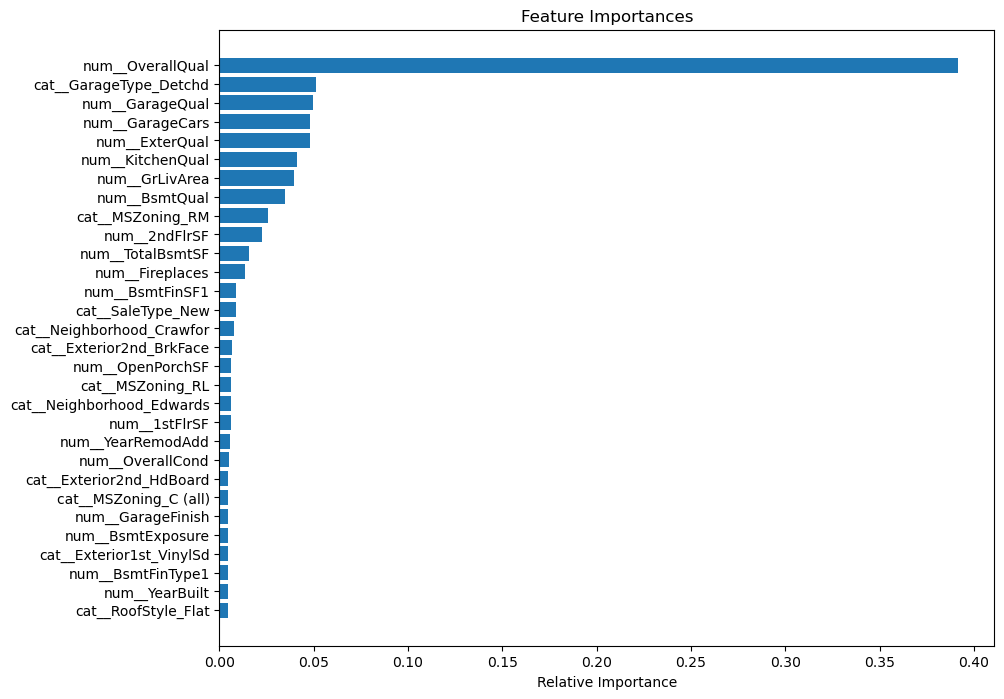

In [98]:
def plot_feature_importances(model, columns, n_features=None):
    """
    Plots feature importances of a fitted model.
    model: the fitted model (after calling .fit())
    columns: list of original feature names before any transformation
    n_features: number of top features to plot, plots all if None
    """
    # Access the regressor from the pipeline
    regressor = model.named_steps['regressor']
    feature_importances = regressor.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(feature_importances)[-n_features:]
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), feature_importances[indices], align="center")
    plt.yticks(range(len(indices)), [transformed_feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

plot_feature_importances(model, X_train.columns, n_features=30)

## PART 4: Hyperparameter Tuning

### A. RF Hypertunned

In [99]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to tune
param_grid = {
    'forest_regressor__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'forest_regressor__max_depth': [None, 10, 20],      # Maximum depth of the tree
    'forest_regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'forest_regressor__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

Best Hyperparameters: {'forest_regressor__max_depth': None, 'forest_regressor__min_samples_leaf': 1, 'forest_regressor__min_samples_split': 2, 'forest_regressor__n_estimators': 200}


In [100]:
# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_RF_hypertunned.csv', index=False)

### B. Simplified RF

Understanding feature importance

In [101]:
import pandas as pd

# Extracting feature names after preprocessing for numeric features
numeric_features = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Extracting feature names after preprocessing for categorical features
categorical_features = list(pipeline.named_steps['preprocessor'].transformers_[1][1]\
    .get_feature_names_out(input_features=X_train.select_dtypes(include=['object']).columns))

# Combine numeric and categorical feature names
feature_names = numeric_features + categorical_features

# Retrieve feature importances
feature_importances = pipeline.named_steps['forest_regressor'].feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)


                   Feature    Importance
5              OverallQual  5.763304e-01
24               GrLivArea  1.171644e-01
23                2ndFlrSF  4.011875e-02
20             TotalBsmtSF  4.003664e-02
16              BsmtFinSF1  2.814773e-02
22                1stFlrSF  2.099411e-02
34              GarageCars  2.050395e-02
35              GarageArea  1.370715e-02
2                  LotArea  1.361348e-02
7                YearBuilt  8.805567e-03
30            TotRmsAbvGrd  7.549666e-03
1              LotFrontage  7.355047e-03
12                BsmtQual  6.450464e-03
32             GarageYrBlt  6.101299e-03
8             YearRemodAdd  5.478612e-03
9               MasVnrArea  5.439519e-03
29             KitchenQual  5.355268e-03
19               BsmtUnfSF  5.004025e-03
6              OverallCond  4.567268e-03
38             OpenPorchSF  4.550051e-03
33            GarageFinish  3.631983e-03
40                  MoSold  3.614156e-03
37              WoodDeckSF  3.564125e-03
31              

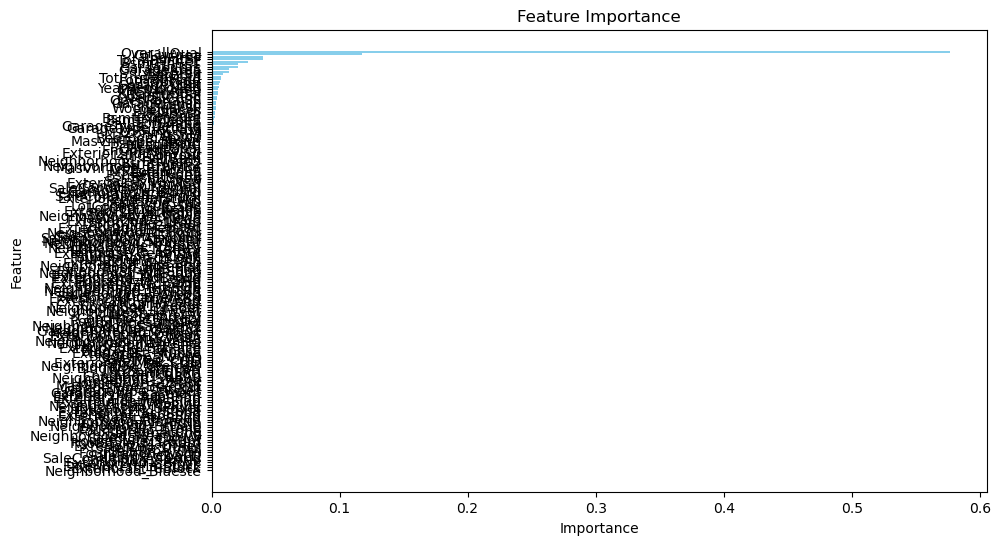

In [102]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

In [103]:
# Extracting the top 5 most important features
top_features = feature_importance_df['Feature'][:10].tolist()

print("Top 10 most important features:")
print(top_features)

Top 10 most important features:
['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 'GarageArea', 'LotArea', 'YearBuilt']


In [104]:
# Create a new DataFrame with only the top 5 features
df_top_features = X_train[top_features].copy()

# Display the new DataFrame
print("DataFrame with only the top 10 most important features:")
print(df_top_features.head())

DataFrame with only the top 10 most important features:
    OverallQual  GrLivArea  2ndFlrSF  TotalBsmtSF  BsmtFinSF1  1stFlrSF  \
Id                                                                        
1             7       1710       854          856         706       856   
2             6       1262         0         1262         978      1262   
3             7       1786       866          920         486       920   
4             7       1717       756          756         216       961   
5             8       2198      1053         1145         655      1145   

    GarageCars  GarageArea  LotArea  YearBuilt  
Id                                              
1            2         548     8450       2003  
2            2         460     9600       1976  
3            2         608    11250       2001  
4            3         642     9550       1915  
5            3         836    14260       2000  


In [105]:
#try new more simple model
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred8 = pipeline.predict(X_test)

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred8})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_RF_simpler.csv', index=False)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### C. GradientBoostingRegressor Hypertunned

In [106]:
#Hypertuning Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for GradientBoostingRegressor
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(modelGB, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_trainset, y_trainset)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_GB = best_model.predict(X_test)

# Create a DataFrame with the predicted values and the corresponding Id
predictions_df = pd.DataFrame({'Id': X_test_reset_index['Id'], 'SalePrice': y_pred_GB})

# Save the DataFrame to a CSV file with headers
predictions_df.to_csv('predicted_values_GB_hypertuned.csv', index=False)

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/aitanahierrogarzon/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarn

## PART 5: Model Evaluation

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### A. Linear Model 

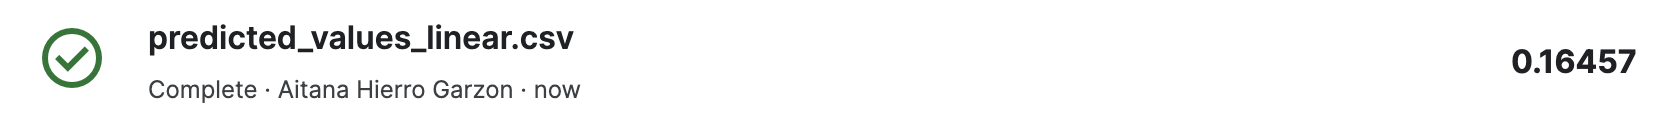

### B. Decision Tree Model 

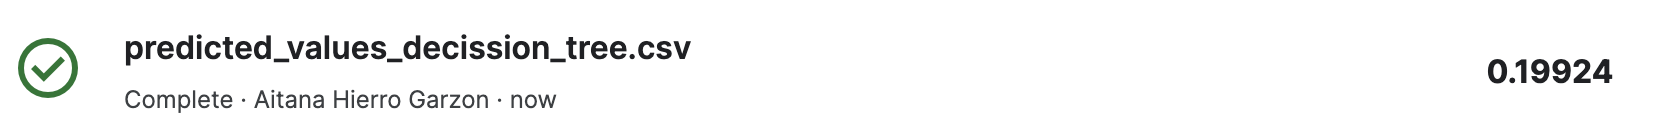

### C. Random Forest Model

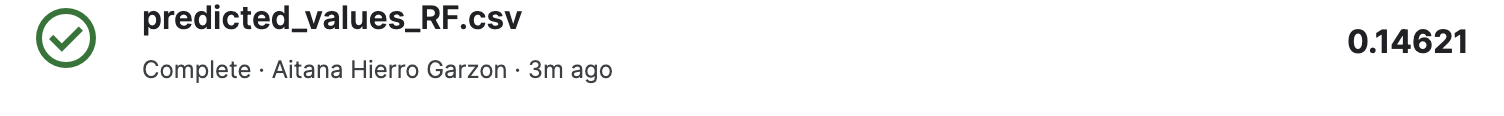

### D. GradientBoostingRegressor

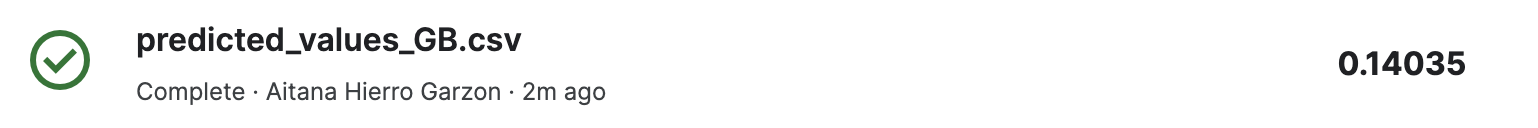

### E. XGBRegressor

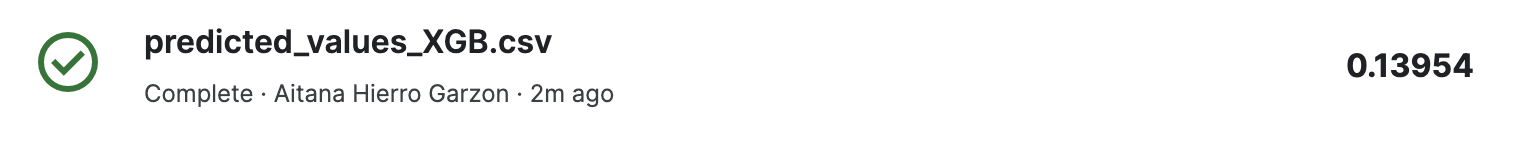

### F. Random Forest Hypertuned

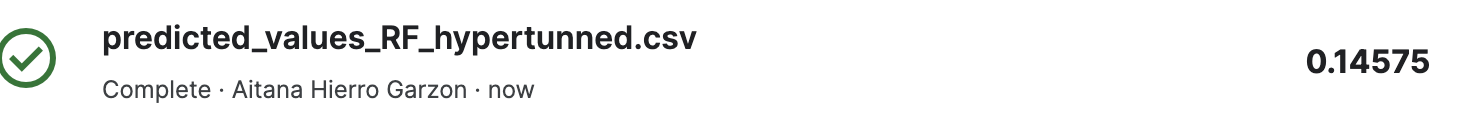

### G. Random Forest Simpler

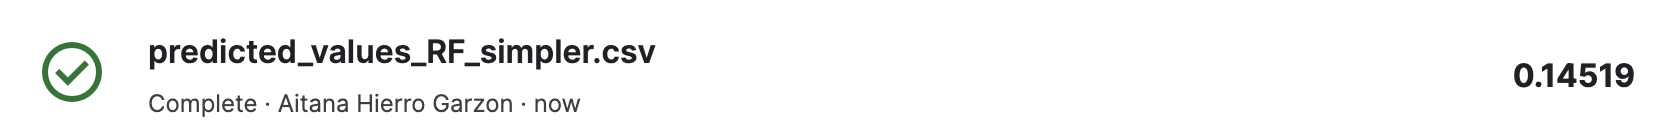

### H. GradientBoostingRegressor Hypertuned

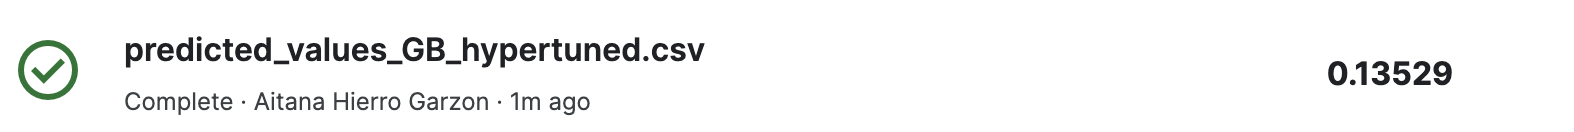